In [23]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm  # color map
import numpy as np
Mpc = 3.0857e22  # Mega parsec in meters

figuresize = 4
plt.rcParams["figure.figsize"] = (figuresize, figuresize*9.7/12)
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['text.usetex'] = False

# Multi Plotting

In the following are the saves from `muli_cluster_polarization.ipynb` combined and plotted.

## parameter definition

In [24]:
r_c = 0.2 * Mpc  # core radius
r = 2.8 * Mpc  # maximum radius
d = 1e6 * Mpc  # distance


short = 4
e = 16*short  # Resolution
c = r/d*1.05  # edge limit (angle). r/d is angle for max. radius r
nr = 1

## Function definition
### polarization orientation
the following function calculates the polarization orientaion and retunrn fitting vectors

In [25]:
def polarization_vectors(Q, U, P, short):
    # extract a few points from array
    Ushort = U[::short, ::short].copy()
    Qshort = Q[::short, ::short].copy()
    Pshort = P[::short, ::short].copy()
    # calculate pol. angle theta
    angle = np.arctan(Ushort/Qshort)/2
    angle[Qshort < 0] += np.pi/2
    # generate vecors from angle with the length P
    polvec_x = np.cos(angle)*Pshort
    polvec_y = np.sin(angle)*Pshort
    return polvec_x, polvec_y

## Import and combination

in the following are the saves imported and added together

In [26]:
# generate variables for calculation
theta = np.linspace(-c, c, e)
Theta, Phi = np.meshgrid(theta, theta)
# generate empty arrays
t = np.linspace(0, 0, e)
t1, t2 = np.meshgrid(t, t)
Q, U, Q_ges, U_ges, Result = t1.copy(), t1.copy(), t1.copy(), t1.copy(), t1.copy()
amount = 0

for i in (1,2,3,4,5,6):
    Qavrg = np.load('saves/multisavefile_nr%i.npz' % i)['Q']
    Uavrg = np.load('saves/multisavefile_nr%i.npz' % i)['U']
    amount_i = np.load('saves/multisavefile_nr%i.npz' % i)['amount']
    amount += amount_i
    Q_ges += Qavrg * amount_i
    U_ges += Uavrg * amount_i

print(amount)

1000


## Calculation

The average $Q$ & $U$ are calculated. Then $P$ and the polarization orientaion.

The overal max vaue of the average $Q$ & $U$ is determined to make plots with same maxima and minima.

In [27]:
Qavrg = Q_ges/amount
Uavrg = U_ges/amount
Pavrg = np.sqrt(Qavrg**2 + Uavrg**2)

polvec_x, polvec_y = polarization_vectors(Qavrg, Uavrg, Pavrg, short)

Qavrg[np.isnan(Qavrg)] = 0
Uavrg[np.isnan(Uavrg)] = 0
Qavrg_max = np.abs(np.max(Qavrg))
Qavrg_min = np.abs(np.min(Qavrg))
Uavrg_max = np.abs(np.max(Uavrg))
Uavrg_min = np.abs(np.min(Uavrg))
max = np.max(np.array([Qavrg_min, Qavrg_max, Uavrg_min, Uavrg_max]))
# set 0 to nan to plot white
Qavrg[Qavrg == 0] = np.NaN
Uavrg[Uavrg == 0] = np.NaN
Pavrg[Pavrg == 0] = np.NaN

## Plots
### svg's
Generate plot for VP1 and VP2. Also a normalized Prot to compare VP1 and VP2 along the x-axis.

Save the plots as svg with latex text.

In [28]:
# edit colorgradient of diagram
colors = cm.get_cmap('coolwarm', 200)
colorcrop = colors(np.linspace(.5, 1, 256))
newcmp = matplotlib.colors.ListedColormap(colorcrop)

plt.contourf(Theta*d/r_c, Phi*d/r_c, Pavrg, 100, cmap=newcmp)
plt.colorbar().set_label("\$P\$", labelpad=-5, y=1.08, rotation=0)
plt.quiver(Theta[::short, ::short]*d/r_c, Phi[::short, ::short] * d/r_c, polvec_x, polvec_y, pivot='mid', headlength=0, headwidth=1)
plt.xlabel("x / \$r_c\$")
plt.ylabel("z / \$r_c\$")
plt.savefig("figs/P-multi"+str(amount)+"Nr"+str(nr)+".svg")
plt.close()

Pavrg[np.isnan(Pavrg)] = 0
plt.plot(Theta[int(e/2)]*d/r_c, Pavrg[int(e/2)], c='black')
plt.xlabel("x / \$r_c\$")
plt.ylabel("\$P\$")
plt.savefig("figs/P2d-multi"+str(amount)+"Nr"+str(nr)+".svg")
plt.close()
Pavrg[Pavrg == 0] = np.NaN

plt.contourf(Theta*d/r_c, Phi*d/r_c, Qavrg, 100,
             cmap='coolwarm', vmin=-max, vmax=max)
plt.xlabel("x / \$r_c\$")
plt.ylabel("z / \$r_c\$")
plt.colorbar().set_label("\$Q/ I_0\$", labelpad=-5, y=1.08, rotation=0)
plt.savefig("figs/Q-multi"+str(amount)+"Nr"+str(nr)+".svg")
plt.close()

plt.contourf(Theta*d/r_c, Phi*d/r_c, Uavrg, 100,
             cmap='coolwarm', vmin=-max, vmax=max)
plt.xlabel("x / \$r_c\$")
plt.ylabel("z / \$r_c\$")
plt.colorbar().set_label("\$U / I_0\$", labelpad=-5, y=1.08, rotation=0)
plt.savefig("figs/U-multi"+str(amount)+"Nr"+str(nr)+".svg")
plt.close()

### Show

generate plots again but show them this time (optional export as PNG)

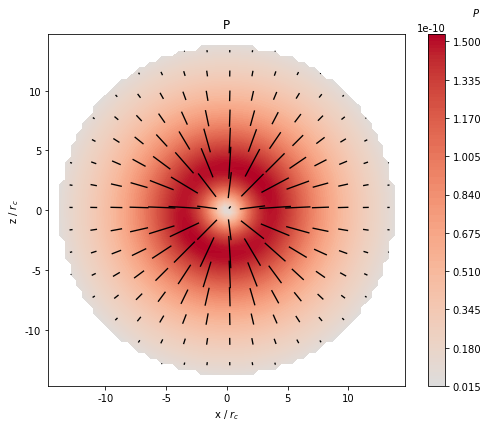

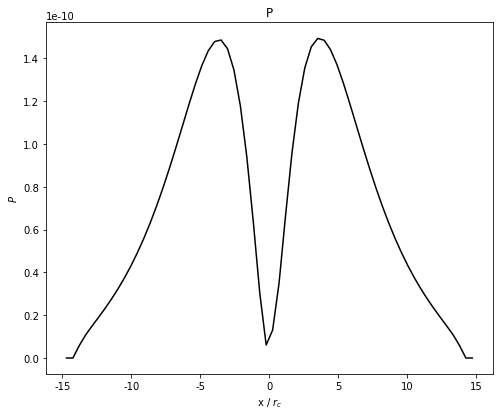

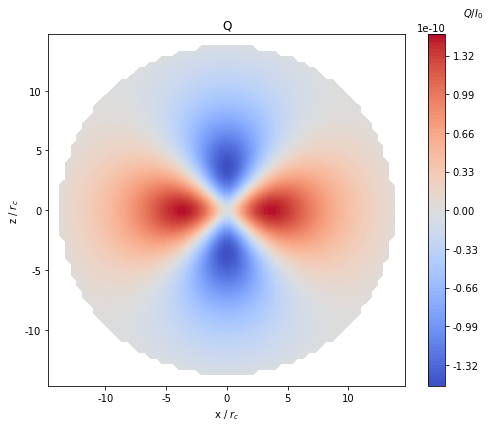

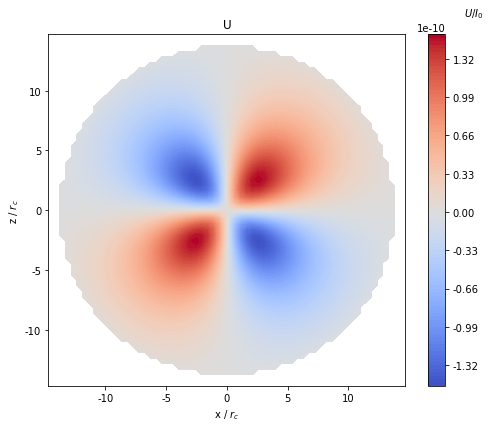

In [29]:
colors = cm.get_cmap('coolwarm', 200)
colorcrop = colors(np.linspace(.5, 1, 256))
newcmp = matplotlib.colors.ListedColormap(colorcrop)

figuresize = 8
plt.rcParams["figure.figsize"] = (figuresize, figuresize*9.7/12)

plt.contourf(Theta*d/r_c, Phi*d/r_c, Pavrg, 100, cmap=newcmp)
# degree of polarization
plt.colorbar().set_label("$P$", labelpad=-5, y=1.08, rotation=0)
# polarization angles
plt.quiver(Theta[::short, ::short]*d/r_c, Phi[::short, ::short]* d/r_c, polvec_x, polvec_y, pivot='mid', headlength=0, headwidth=1)
plt.xlabel("x / $r_c$")
plt.ylabel("z / $r_c$")
plt.title("P")
plt.show()

# cut
Pavrg[np.isnan(Pavrg)] = 0
plt.plot(Theta[int(e/2)]*d/r_c, Pavrg[int(e/2)], c='black')
Pavrg[Pavrg == 0] = np.NaN
plt.xlabel("x / $r_c$")
plt.ylabel("$P$")
plt.title("P")
plt.show()

plt.contourf(Theta*d/r_c, Phi*d/r_c, Qavrg, 100,
             cmap='coolwarm', vmin=-max, vmax=max)
plt.xlabel("x / $r_c$")
plt.ylabel("z / $r_c$")
plt.colorbar().set_label("$Q/ I_0$", labelpad=-5, y=1.08, rotation=0)
plt.title("Q")
plt.show()

plt.contourf(Theta*d/r_c, Phi*d/r_c, Uavrg, 100,
             cmap='coolwarm', vmin=-max, vmax=max)
plt.xlabel("x / $r_c$")
plt.ylabel("z / $r_c$")
plt.colorbar().set_label("$U / I_0$", labelpad=-5, y=1.08, rotation=0)
plt.title("U")
plt.show()